In [1]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import glob
import os
import ipywidgets as widgets
from IPython.display import clear_output
import sys
import time
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
# import seaborn as sns
import fnmatch
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
# from sherpa.astro import ui
# # CIAO Imports
# # import ciao_contrib.runtool
# # from ciao_contrib.runtool import *
# # CUSTOM Imports
# from data_extraction_functions import *
# from data_exploration_functions import *
# from data_representation_functions import *
def list_folders_fun(path):
    """
    DESCRIPTION: List folders in a given directory.
    INPUT: Directory path
    OUTPUT: Folder names in a given directory
    """
    folder_list = [f.name for f in Path(path).iterdir() if f.is_dir()]
    return folder_list

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Custom object hook to convert lists of lists to NumPy arrays
def numpy_hook(obj):
    if isinstance(obj, list):
        # Check if the list contains sublists (i.e. a matrix)
        if isinstance(obj[0], list):
            # Convert the list of lists to a NumPy array matrix
            return np.array(obj)
    # Return all other objects as is
    return obj

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget


Dropdown(description='Set :', options=('Full', 'All', 'Full_extra', 'New', 'Bona'), value='Full')

In [2]:
set_id = set_widget.value

dfin = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')

df = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df['obsreg_id'] = df['obsid'].astype(str) + '_' + df['region_id'].astype(str)
dfin = dfin.drop_duplicates('obsreg_id', keep='first').reset_index()
ids = list(dfin['obsreg_id'].values)
df = df[df['obsreg_id'].isin(ids)]
# Separate DataFrames based on observation year substrings
df20 = df[df['gti_obs'].str.contains('1999') | df['gti_obs'].str.contains('200') | df['gti_obs'].str.contains('2010') | df['gti_obs'].str.contains('2011') | df['gti_obs'].str.contains('2012') | df['gti_obs'].str.contains('2013') | df['gti_obs'].str.contains('2014')]
df20_ids = df20['obsreg_id'].values
df20_sources = df20['name'].unique()
df21 = df[df['gti_obs'].str.contains('2015') | df['gti_obs'].str.contains('2016') | df['gti_obs'].str.contains('2017') | df['gti_obs'].str.contains('2018') | df['gti_obs'].str.contains('2019') | df['gti_obs'].str.contains('202') | df['gti_obs'].str.contains('2021') | df['gti_obs'].str.contains('2022') | df['gti_obs'].str.contains('2023')]
df21_ids = df21['obsreg_id'].values
df21_sources = df21['name'].unique()


sources_all = list(set(list(df20_sources) + list(df21_sources)))

print(len(df20))
print(len(df21))

print(len(df20_sources))
print(len(df21_sources))

sources_new = [name for name in df21_sources if name not in df20_sources]
print(len(sources_new))

df_old = df[df['name'].isin(df20_sources)].drop_duplicates('name', keep='first').reset_index()
df_new = df[df['name'].isin(sources_new)].drop_duplicates('name', keep='first').reset_index()

print(len(df_old))

print(len(df_new))

print(len(df_old) + len(df_new))

ra_old = df_old.ra.values
dec_old = df_old.dec.values
ra_new= df_new.ra.values
dec_new = df_new.dec.values


77051
18824
49929
11108
9003
49929
9003
58932


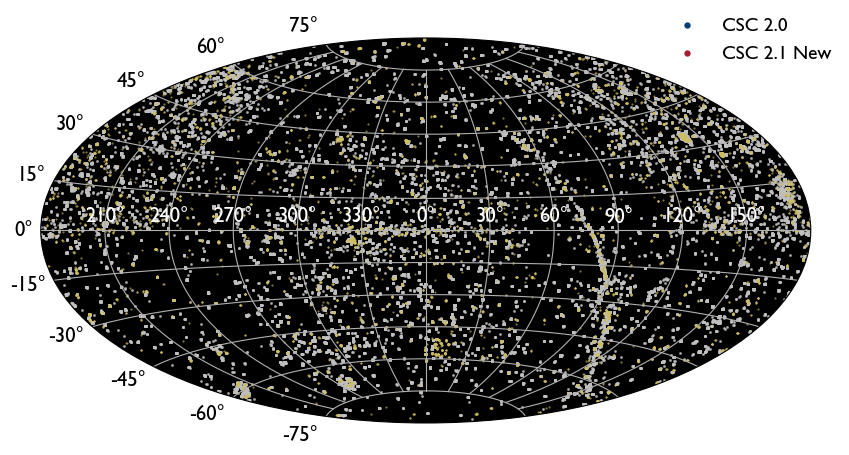

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

face = 'black'  # '#ebebeb'

# Plotting in Mollweide projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old + 360 - org_old, 360)  # shift RA values
ind_old = x_old > 180
x_old[ind_old] -= 360  # scale conversion to [-180, 180]
ra2_old = -x_old  # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150])  # Adjusted tick labels
tick_labels = np.remainder(tick_labels + 360 + org_old, 360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign = u'\N{DEGREE SIGN}'
tick_labels = [str(i) + degree_sign for i in tick_labels]
ytick_labels = [str(i) + degree_sign for i in ytick_labels]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='.', c=silver2, s=5, alpha=0.7)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels[::-1])  # Reverse the tick labels

org = 0
x = np.remainder(ra_new + 360 - org, 360)  # shift RA values
ind = x > 180
x[ind] -= 360  # scale conversion to [-180, 180]
ra2 = -x  # reverse the scale: East to the left

scatter2 = ax.scatter(np.radians(ra2), np.radians(dec_new), marker='.', c=gold, s=1, alpha=0.7)

custom_markers = [plt.scatter([], [], marker='.', color=imperial, edgecolor=imperial, s=50),
                  plt.scatter([], [], marker='.', color=harvard, edgecolor=harvard, s=50)]

legend = ax.legend(handles=custom_markers, labels=['CSC 2.0', 'CSC 2.1 New'], loc='upper right', frameon=False,
                   fontsize=14, bbox_to_anchor=(1.05, 1.1))

plt.show()

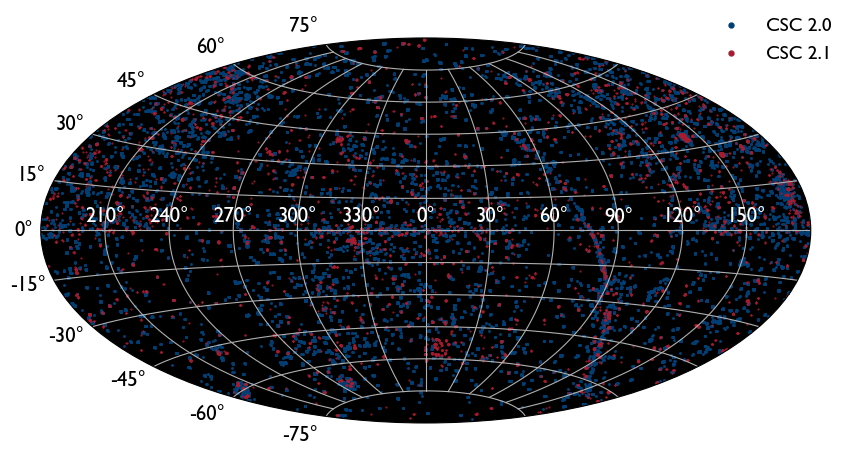

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

face = 'black'  # '#ebebeb'

# Plotting in Mollweide projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old + 360 - org_old, 360)  # shift RA values
ind_old = x_old > 180
x_old[ind_old] -= 360  # scale conversion to [-180, 180]
ra2_old = -x_old  # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150])  # Adjusted tick labels
tick_labels = np.remainder(tick_labels + 360 + org_old, 360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign = u'\N{DEGREE SIGN}'
tick_labels = [str(i) + degree_sign for i in tick_labels]
ytick_labels = [str(i) + degree_sign for i in ytick_labels]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='.', c=imperial, s=5, alpha=1)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels[::-1])  # Reverse the tick labels

org = 0
x = np.remainder(ra_new + 360 - org, 360)  # shift RA values
ind = x > 180
x[ind] -= 360  # scale conversion to [-180, 180]
ra2 = -x  # reverse the scale: East to the left

scatter2 = ax.scatter(np.radians(ra2), np.radians(dec_new), marker='.', c=harvard, s=1, alpha=1)

custom_markers = [plt.scatter([], [], marker='.', color=imperial, edgecolor=imperial, s=50),
                  plt.scatter([], [], marker='.', color=harvard, edgecolor=harvard, s=50)]

legend = ax.legend(handles=custom_markers, labels=['CSC 2.0', 'CSC 2.1'], loc='upper right', frameon=False,
                   fontsize=14, bbox_to_anchor=(1.05, 1.1))

plt.show()

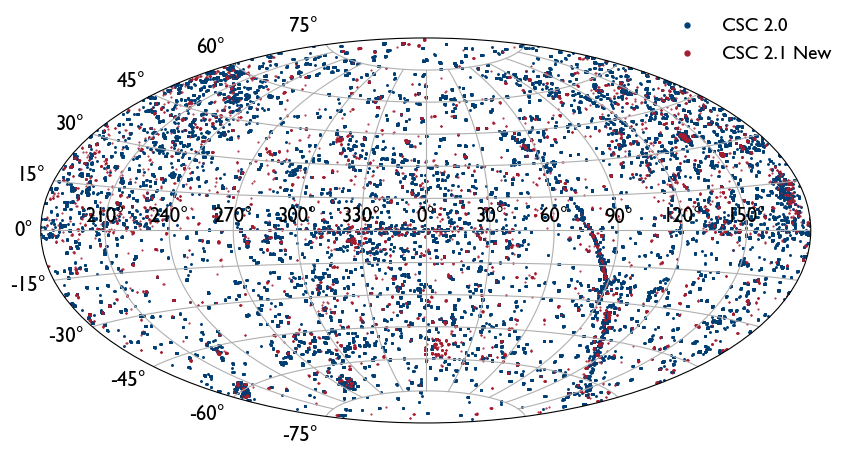

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

face = 'white'  # '#ebebeb'

# Plotting in Mollweide projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old + 360 - org_old, 360)  # shift RA values
ind_old = x_old > 180
x_old[ind_old] -= 360  # scale conversion to [-180, 180]
ra2_old = -x_old  # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150])  # Adjusted tick labels
tick_labels = np.remainder(tick_labels + 360 + org_old, 360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign = u'\N{DEGREE SIGN}'
tick_labels = [str(i) + degree_sign for i in tick_labels]
ytick_labels = [str(i) + degree_sign for i in ytick_labels]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='.', c=imperial, s=5, alpha=1)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels[::-1])  # Reverse the tick labels

org = 0
x = np.remainder(ra_new + 360 - org, 360)  # shift RA values
ind = x > 180
x[ind] -= 360  # scale conversion to [-180, 180]
ra2 = -x  # reverse the scale: East to the left

scatter2 = ax.scatter(np.radians(ra2), np.radians(dec_new), marker='.', c=harvard, s=1, alpha=1)

custom_markers = [plt.scatter([], [], marker='.', color=imperial, edgecolor=imperial, s=50),
                  plt.scatter([], [], marker='.', color=harvard, edgecolor=harvard, s=50)]

legend = ax.legend(handles=custom_markers, labels=['CSC 2.0', 'CSC 2.1 New'], loc='upper right', frameon=False,
                   fontsize=14, bbox_to_anchor=(1.05, 1.1))

plt.show()

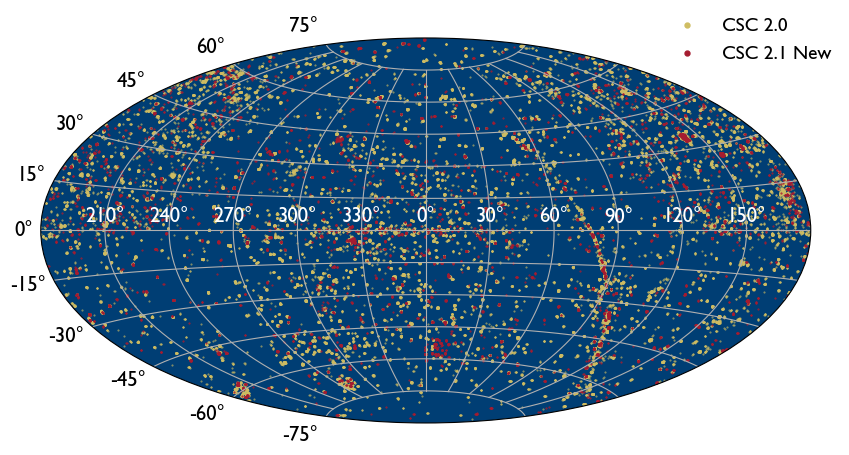

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

face = imperial  # '#ebebeb'

# Plotting in Mollweide projection
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old + 360 - org_old, 360)  # shift RA values
ind_old = x_old > 180
x_old[ind_old] -= 360  # scale conversion to [-180, 180]
ra2_old = -x_old  # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, -30, -60, -90, -120, -150])  # Adjusted tick labels
tick_labels = np.remainder(tick_labels + 360 + org_old, 360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign = u'\N{DEGREE SIGN}'
tick_labels = [str(i) + degree_sign for i in tick_labels]
ytick_labels = [str(i) + degree_sign for i in ytick_labels]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='.', c=gold, s=1, alpha=0.7)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels[::-1])  # Reverse the tick labels

org = 0
x = np.remainder(ra_new + 360 - org, 360)  # shift RA values
ind = x > 180
x[ind] -= 360  # scale conversion to [-180, 180]
ra2 = -x  # reverse the scale: East to the left

scatter2 = ax.scatter(np.radians(ra2), np.radians(dec_new), marker='.', c=harvard, s=1, alpha=1, label='CSC 2.1')

custom_markers = [plt.scatter([], [], marker='.', color=gold, edgecolor=gold, s=50),
                  plt.scatter([], [], marker='.', color=harvard, edgecolor=harvard, s=50)]

legend = ax.legend(handles=custom_markers, labels=['CSC 2.0', 'CSC 2.1 New'], loc='upper right', frameon=False,
                   fontsize=14, bbox_to_anchor=(1.05, 1.1))

plt.show()


In [19]:
len(dfin)

95473

In [2]:
# Set ID
set_id = set_widget.value

df_properties_input_old = pd.read_csv(f'{global_path}/All/properties-input-All.csv')
df_properties_global_old = pd.read_csv(f'{global_path}/All/properties-All.csv')
df_properties_global_old['obsreg_id'] = df_properties_global_old['obsid'].astype(str) + '_' + df_properties_global_old['region_id'].astype(str)

existing_ids1 = df_properties_input_old['obsreg_id'].values


df_results_old = df_properties_global_old[df_properties_global_old['obsreg_id'].isin(existing_ids1)]
df_sources_old = df_results_old.groupby(['name','ra','dec']).count()
df_sources_old = df_sources_old.rename(columns={'obsreg_id': 'counts'}).reset_index()
print("Number of Sources (Old): ", len(df_sources_old))
ra_old = df_sources_old.ra.values
dec_old = df_sources_old.dec.values
counts_old = df_sources_old.counts.values

existing_ids = df_properties_input_old['obsreg_id'].values

# Load properties
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')

df_properties_input  = df_properties_input[~df_properties_input['obsreg_id'].isin(existing_ids)]


df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)
df_properties = df_properties_input.drop_duplicates('obsreg_id', keep='first').reset_index()
ids = list(df_properties['obsreg_id'].values)
df_results = df_properties_global[df_properties_global['obsreg_id'].isin(ids)]
print("Number of Property Sets: ", len(df_properties))
df_sources = df_results.groupby(['name','ra','dec']).count()
df_sources = df_sources.rename(columns={'obsreg_id': 'counts'}).reset_index()
print("Number of Sources: ", len(df_sources))
print('Average Number of Observations per Source: ', len(df_properties)/len(df_sources))
ra = df_sources.ra.values
dec = df_sources.dec.values
counts = df_sources.counts.values




df_sources.head()


Number of Sources (Old):  49468
Number of Property Sets:  37314
Number of Sources:  22122
Average Number of Observations per Source:  1.6867371847030106


,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,counts
0,2CXO J000002.4+321750,0.010280,32.297465,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
1,2CXO J000004.2+004038,0.017437,0.677247,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
2,2CXO J000010.0-501526,0.041613,-50.257491,2,2,2,2,2,2,2,...,2,2,2,2,2,2,0,2,2,2
3,2CXO J000016.9-500906,0.070605,-50.151865,1,1,1,1,1,1,1,...,1,1,1,1,0,1,0,1,1,1
4,2CXO J000018.3-574638,0.076708,-57.777397,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1


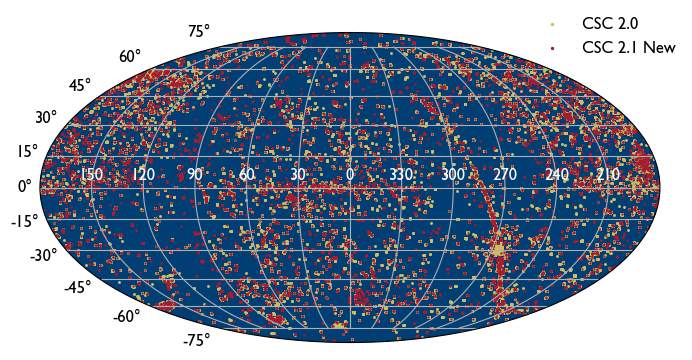

In [6]:
# Define Font Settings
plt.rcParams.update({'font.size': 12})
# plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
# Plotting in Mollweide projection
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'mollweide'}, figsize=(8, 5))#, constrained_layout = True)

org_old = 0
x_old = np.remainder(ra_old+360-org_old,360) # shift RA values
ind_old = x_old>180
x_old[ind_old] -=360    # scale conversion to [-180, 180]
ra2_old=-x_old    # reverse the scale: East to the left
tick_labels_old = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels_old = np.remainder(tick_labels_old+360+org_old,360)
ax.set_xticklabels(tick_labels_old) 

scatter2 = ax.scatter(np.radians(ra2_old), np.radians(dec_old),marker = '.', c=gold, s=5, alpha=1,label='CSC 2.0') 

org = 0
x = np.remainder(ra+360-org,360) # shift RA values
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
ra2=-x    # reverse the scale: East to the left
tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+org,360)
ax.set_xticklabels(tick_labels) 

scatter = ax.scatter(np.radians(ra2), np.radians(dec),marker= '.',c=harvard, s=2, alpha=1, label='CSC 2.1') 

# ax.xaxis.grid(color='white', linestyle='-', alpha=0.55)
# ax.yaxis.grid(color='white', linestyle='-', alpha=0.55)
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_facecolor(imperial)
ax.grid(True)

custom_markers = [plt.scatter([], [], marker='.', color=gold, s=8),
                  plt.scatter([], [], marker='.', color=harvard, s=8)]

plt.legend(handles=custom_markers, labels=['CSC 2.0', 'CSC 2.1 New'], loc='upper right', frameon=False, fontsize = 12, bbox_to_anchor=(1.05, 1.1))

plt.show()


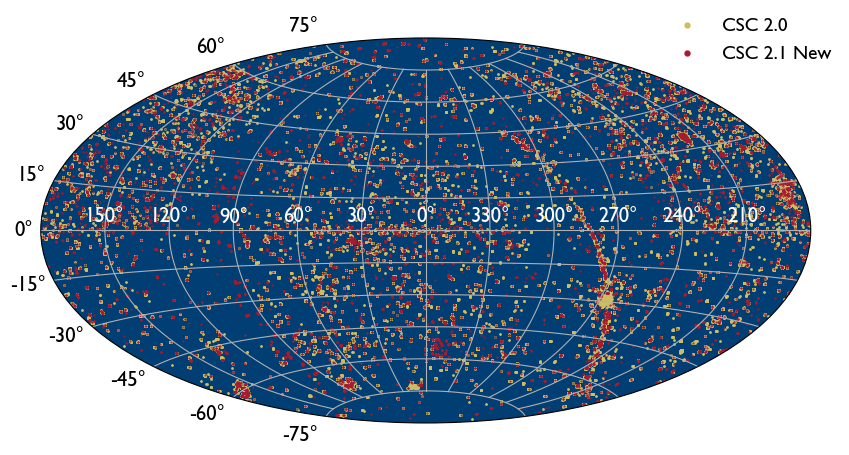

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
dark = '#003170'
bright = '#cfbd62'
gr = '#777777'

face = imperial # '#ebebeb'

# Plotting in Mollweide projection
fig, ax = plt.subplots(1,1,subplot_kw={'projection': 'aitoff'}, figsize=(40, 5))
ax.grid(True)
ax.set_facecolor(face)

org_old = 0
x_old = np.remainder(ra_old+360-org_old,360) # shift RA values
ind_old = x_old>180
x_old[ind_old] -=360    # scale conversion to [-180, 180]
ra2_old=-x_old    # reverse the scale: East to the left

tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
tick_labels = np.remainder(tick_labels+360+org_old,360)
ytick_labels = np.array([90, 75, 60, 45, 30, 15, 0, -15, -30, -45, -60, -75, -90])

degree_sign= u'\N{DEGREE SIGN}'
tick_labels  = [str(i) + degree_sign for i in tick_labels ]
ytick_labels = [str(i) + degree_sign for i in ytick_labels ]

scatter = ax.scatter(np.radians(ra2_old), np.radians(dec_old), marker='.', c=gold, s=4, alpha=1, label='CSC 2.1') 
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='black')
ax.set_xticklabels(tick_labels) 

org = 0
x = np.remainder(ra+360-org,360) # shift RA values
ind = x>180
x[ind] -=360    # scale conversion to [-180, 180]
ra2=-x    # reverse the scale: East to the left

scatter2 = ax.scatter(np.radians(ra2), np.radians(dec), marker='.', c=harvard, s=1, alpha=1, label='CSC 2.1') 

custom_markers = [plt.scatter([], [], marker='.', color=gold, edgecolor=gold, s=50),
                  plt.scatter([], [], marker='.', color=harvard, edgecolor=harvard, s=50)]

legend = ax.legend(handles=custom_markers, labels=['CSC 2.0','CSC 2.1 New'], loc='upper right', frameon=False, fontsize=14, bbox_to_anchor=(1.05, 1.1))

plt.show()


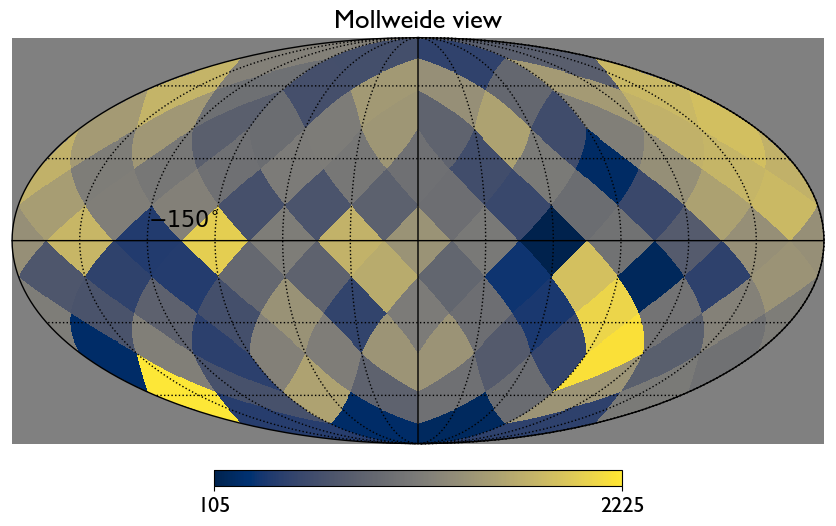

In [54]:
from astropy.coordinates import SkyCoord
import healpy as hp

def cat2hpx(ra, dec, nside, radec=True):
    """
    Convert a catalogue to a HEALPix map of number counts per resolution
    element.

    Parameters
    ----------
    lon, lat : (ndarray, ndarray)
        Coordinates of the sources in degree. If radec=True, assume input is in the icrs
        coordinate system. Otherwise assume input is glon, glat

    nside : int
        HEALPix nside of the target map

    radec : bool
        Switch between R.A./Dec and glon/glat as input coordinate system.

    Return
    ------
    hpx_map : ndarray
        HEALPix map of the catalogue number counts in Galactic coordinates

    """

    npix = hp.nside2npix(nside)

    l, b = ra, dec

    # conver to theta, phi
    theta = np.radians(90-b)
    phi = np.radians(l)

    # convert to HEALPix indices
    indices = hp.ang2pix(nside, theta, phi)

    idx, counts = np.unique(indices, return_counts=True)

    # fill the fullsky map
    hpx_map = np.zeros(npix, dtype=int)
    hpx_map[idx] = counts

    return hpx_map

nside = 3
hpx_map = cat2hpx(ra, dec, nside, radec=True)
hp.mollview(hpx_map, unit="", rot=(0,0,0), cmap='cividis', flip='astro',return_projected_map=True,norm=LogNorm())
hp.projtext(-150-90,5, '$-150^{\circ}$', lonlat=True)

# hp.projtext(180, 30, '$30^{\circ}$', lonlat=True)
# hp.projtext(180, 0, '$0^{\circ}$', lonlat=True)
# hp.projtext(180, -60, '$-60^{\circ}$', lonlat=True)
# hp.projtext(180, -30, '$-30^{\circ}$', lonlat=True)
# hp.projtext(0, 0, '$0^{\circ}$', lonlat=True)
# hp.projtext(30, 0, '$30^{\circ}$', lonlat=True)
# hp.projtext(60, 0, '$60^{\circ}$', lonlat=True)
# hp.projtext(90, 0, '$90^{\circ}$', lonlat=True)
# hp.projtext(120, 0, '$120^{\circ}$', lonlat=True)
# hp.projtext(150, 0, '$150^{\circ}$', lonlat=True)
# hp.projtext(179, 0, '$180^{\circ}$', lonlat=True)
# hp.projtext(0, 0, '$0^{\circ}$', lonlat=True)
# hp.projtext(210, 0, '$210^{\circ}$', lonlat=True)
# hp.projtext(240, 0, '$240^{\circ}$', lonlat=True)
# hp.projtext(270, 0, '$270^{\circ}$', lonlat=True)
# hp.projtext(300, 0, '$300^{\circ}$', lonlat=True)
# hp.projtext(330, 0, '$330^{\circ}$', lonlat=True)
hp.graticule()
